# Mestrado 2023 - Implementações

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from optimize import fit_data
import optimize
from new_wave import get_transition_points

In [102]:
# Import data
data = pd.read_csv("../Datasets/italy_regions.csv") 

cities = ['Lombardia', 'Lazio', 'Campania', 'Veneto', 'Sicilia']

city_name = 'Sicilia' #region 
indicator='ICU Admissions'

In [103]:
data.columns

Index(['Unnamed: 0', 'data', 'denominazione_regione', 'ricoverati_con_sintomi',
       'terapia_intensiva', 'totale_ospedalizzati', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'deceduti',
       'totale_casi', 'ingressi_terapia_intensiva'],
      dtype='object')

In [104]:
# Filtra região de interesse
data = data[data['denominazione_regione'] == city_name]

# Get daily indicator
daily_data = data['terapia_intensiva']

In [105]:
data.data.tolist()[780]

'2022-04-14T17:00:00'

In [106]:
data.data.tolist()[951]

'2022-10-02T17:00:00'

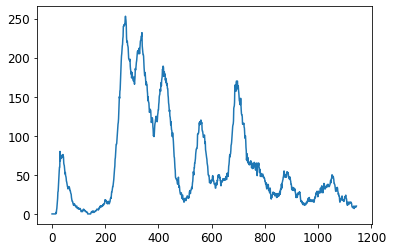

In [107]:
plt.plot(np.linspace(0, len(daily_data)-1, len(daily_data)), daily_data)

In [108]:
max(daily_data)

253

In [109]:
# Get cummulative indicator from daily data
acc_data = []
for i in range(len(daily_data)):
    acc_data.append(np.sum(daily_data[:i]))

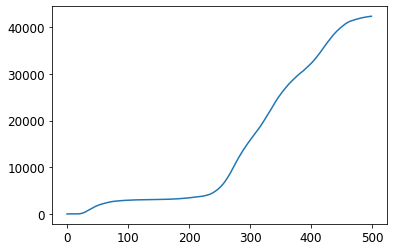

In [110]:
plt.plot(acc_data[:500])

In [111]:
# time array
t = np.linspace(0, len(acc_data)-1, len(acc_data))

normalized_acc_data = acc_data / max(acc_data)

#scaling_factor = 1000
scaling_factor = max(acc_data)
#scaling_factor = 1

acc_data = np.array(acc_data) / scaling_factor
daily_data = list(daily_data/ scaling_factor)

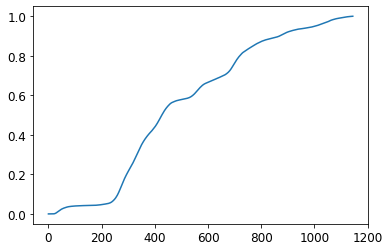

In [112]:
plt.plot(normalized_acc_data)

In [113]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    return [A0, tp0]
    
optimize.update_cond = update_cond_nw

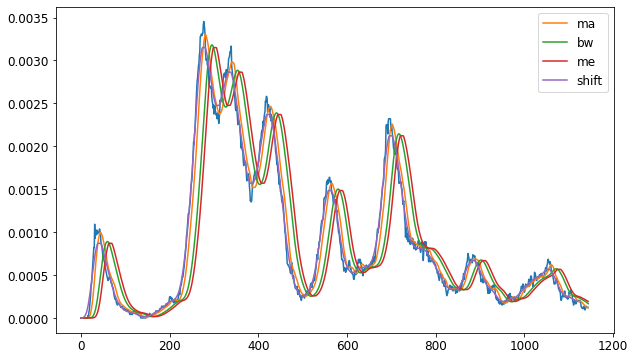

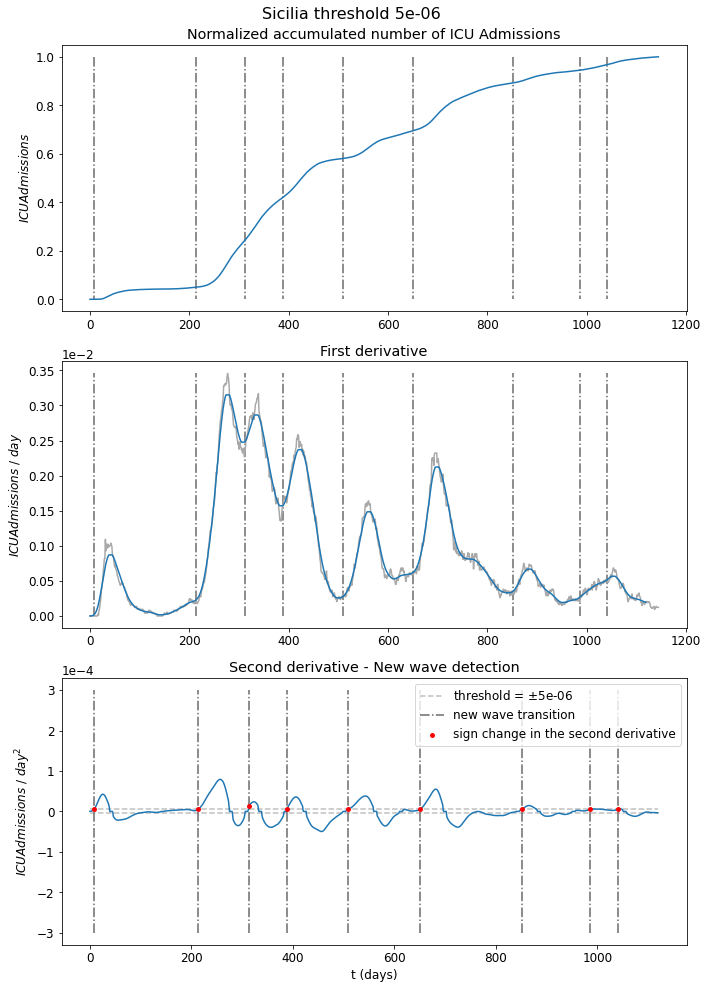

x_nw: [213, 313, 389, 509, 651, 852]


In [114]:
# Transition Points
x_nw = get_transition_points(scaling_factor*acc_data, visual=True, threshold=5e-6, indicator = indicator, city_name=city_name)

#x_nw = x_nw[:6]

# Campania e Sicilia
x_nw = x_nw[1:7]

print('x_nw:', x_nw)

In [115]:
#x_nw = [189, 361, 532, 630, 865, 1144]

In [116]:
x_nw

[213, 313, 389, 509, 651, 852]

In [117]:
if (x_nw[-1] != len(acc_data) - 1):
    x_nw.append(len(acc_data) - 1)  

In [118]:
city_name

'Sicilia'

In [119]:
# utilizando scaling_factor = max(acc_data)

if (city_name == 'Lombardia'):
    # Manual (old)
    #x_nw = [189, 361, 532, 630, 865, 1144]

    # New automatic Lombardia
    x_nw = [174, 356, 523, 624, 856, 951]
elif (city_name == 'Lazio'):
    # New automatic Lazio
    x_nw = [187, 373, 514, 609, 839, 950]
elif (city_name == 'Campania'):
    # New automatic Campania 3e-6 x_nw[1:7]
    x_nw =  [184, 337, 525, 625, 646, 780]
elif (city_name == 'Veneto'):
    # new automatic Veneto 2e-6
    x_nw =  [183, 371, 506, 612, 800, 845]
elif (city_name == 'Sicilia'):
    #x_nw = [156, 320, 396, 513, 635, 852, 973] # com ITSE_norm e scaling_factor = 1000

    # Siscilia 5e-6 manual (213 -> 150) com th 5e-6 x_nw[1:7]
    x_nw = [150, 313, 389, 509, 651, 852]


In [120]:
#x_nw = [150, 313, 389, 509, 651, 852]

### Ajuste do modelo utilizando ITSE_norm

In [122]:
data['data'].to_list()[1130]

'2023-03-30T17:00:00'

In [123]:
rel_rmse_list

['1.444%', '1.148%', '0.291%', '0.141%', '0.204%', '0.219%']

In [124]:
rel_rmse_list_pred

['1.287%', '5.138%', '1.039%', '0.137%', '1.019%', '0.628%']

In [125]:
pd.DataFrame({
                'Relative RMSE':rel_rmse_list,
                'Relative RMSE (Predictions)':rel_rmse_list_pred,
              })

,Relative RMSE,Relative RMSE (Predictions)
0,1.444%,1.287%
1,1.148%,5.138%
2,0.291%,1.039%
3,0.141%,0.137%
4,0.204%,1.019%
5,0.219%,0.628%
